In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weatherhistory/weatherHistory.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
filepath = '/kaggle/input/weatherhistory/weatherHistory.csv'
data = pd.read_csv(filepath)
data.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [5]:
data.shape

(96453, 12)

In [6]:
data.info

<bound method DataFrame.info of                       Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1

In [7]:
# now check for missing columns 
data.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [8]:
data['Formatted Date'].head()

0    2006-04-01 00:00:00.000 +0200
1    2006-04-01 01:00:00.000 +0200
2    2006-04-01 02:00:00.000 +0200
3    2006-04-01 03:00:00.000 +0200
4    2006-04-01 04:00:00.000 +0200
Name: Formatted Date, dtype: object

In [9]:
data.drop(['Loud Cover'], axis = 1, inplace = True)
data.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  \
0                   251.0          15.8263               1015.13   
1                   259.0          15.8263               1015.63   
2                   204.0          14.9569               1015.94   
3                   269.0          15.8263               1016.41   
4                   259.0          15.8263               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [10]:
#calculate missing percentage
miss_percent = (data.isna().sum().sum()/np.product(data.shape))*100
miss_percent

0.04872839621369994

In [11]:
data['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [12]:
# replacing nan values with the below fill method
data['Precip Type'].fillna(axis = 0, method = 'bfill', inplace= True)
data.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  \
0                   251.0          15.8263               1015.13   
1                   259.0          15.8263               1015.63   
2                   204.0          14.9569               1015.94   
3                   269.0          15.8263               1016.41   
4                   259.0          15.8263               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [13]:
data.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [14]:
data['Formatted Date'].head()

0    2006-04-01 00:00:00.000 +0200
1    2006-04-01 01:00:00.000 +0200
2    2006-04-01 02:00:00.000 +0200
3    2006-04-01 03:00:00.000 +0200
4    2006-04-01 04:00:00.000 +0200
Name: Formatted Date, dtype: object

In [15]:
#converting time to utc format
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc= True)
data['Formatted Date'].head()

0   2006-03-31 22:00:00+00:00
1   2006-03-31 23:00:00+00:00
2   2006-04-01 00:00:00+00:00
3   2006-04-01 01:00:00+00:00
4   2006-04-01 02:00:00+00:00
Name: Formatted Date, dtype: datetime64[ns, UTC]

In [16]:
#changing index to date
data.set_index(['Formatted Date'], inplace = True)
data.head()

Summary Precip Type  Temperature (C)  \
Formatted Date                                                          
2006-03-31 22:00:00+00:00  Partly Cloudy        rain         9.472222   
2006-03-31 23:00:00+00:00  Partly Cloudy        rain         9.355556   
2006-04-01 00:00:00+00:00  Mostly Cloudy        rain         9.377778   
2006-04-01 01:00:00+00:00  Partly Cloudy        rain         8.288889   
2006-04-01 02:00:00+00:00  Mostly Cloudy        rain         8.755556   

                           Apparent Temperature (C)  Humidity  \
Formatted Date                                                  
2006-03-31 22:00:00+00:00                  7.388889      0.89   
2006-03-31 23:00:00+00:00                  7.227778      0.86   
2006-04-01 00:00:00+00:00                  9.377778      0.89   
2006-04-01 01:00:00+00:00                  5.944444      0.83   
2006-04-01 02:00:00+00:00                  6.977778      0.83   

                           Wind Speed (km/h)  Wind Bearing (degrees)  \
Formatted Date                                                         
2006-03-31 22:00:00+00:00            14.1197                   251.0   
2006-03-31 23:00:00+00:00            14.2646                   259.0   
2006-04-01 00:00:00+00:00             3.9284                   204.0   
2006-04-01 01:00:00+00:00            14.1036                   269.0   
2006-04-01 02:00:00+00:00            11.0446                   259.0   

                           Visibility (km)  Pressure (millibars)  \
Formatted Date                                                     
2006-03-31 22:00:00+00:00          15.8263               1015.13   
2006-03-31 23:00:00+00:00          15.8263               1015.63   
2006-04-01 00:00:00+00:00          14.9569               1015.94   
2006-04-01 01:00:00+00:00          15.8263               1016.41   
2006-04-01 02:00:00+00:00          15.8263               1016.51   

                                               Daily Summary  
Formatted Date                                                
2006-03-31 22:00:00+00:00  Partly cloudy throughout the day.  
2006-03-31 23:00:00+00:00  Partly cloudy throughout the day.  
2006-04-01 00:00:00+00:00  Partly cloudy throughout the day.  
2006-04-01 01:00:00+00:00  Partly cloudy throughout the day.  
2006-04-01 02:00:00+00:00  Partly cloudy throughout the day.

In [17]:
data.nunique()

Summary                       27
Precip Type                    2
Temperature (C)             7574
Apparent Temperature (C)    8984
Humidity                      90
Wind Speed (km/h)           2484
Wind Bearing (degrees)       360
Visibility (km)              949
Pressure (millibars)        4979
Daily Summary                214
dtype: int64

In [18]:
 #Setting plot style
sns.set_style(style = 'whitegrid')

In [19]:
data.describe()

Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
count       96453.000000            96453.000000     96453.000000   
mean           10.810640              187.509232        10.347325   
std             6.913571              107.383428         4.192123   
min             0.000000                0.000000         0.000000   
25%             5.828200              116.000000         8.339800   
50%             9.965900              180.000000        10.046400   
75%            14.135800              290.000000        14.812000   
max            63.852600              359.000000        16.100000   

       Pressure (millibars)  
count          96453.000000  
mean            1003.235956  
std              116.969906  
min                0.000000  
25%             1011.900000  
50%             1016.450000  
75%             1021.090000  
max             1046.380000

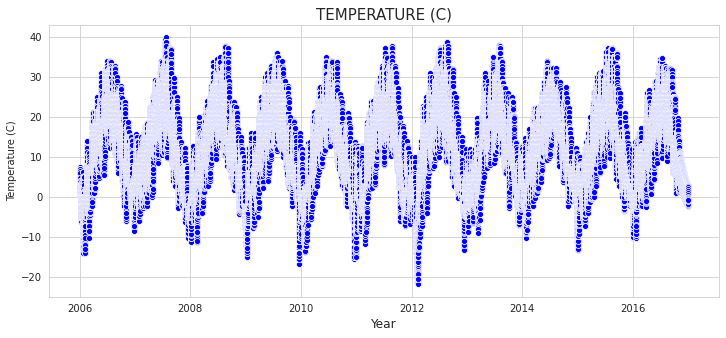

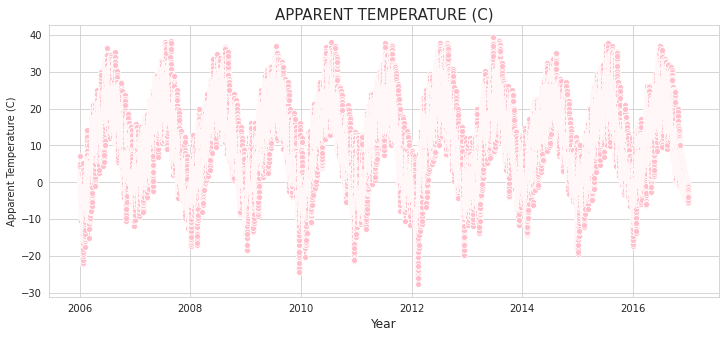

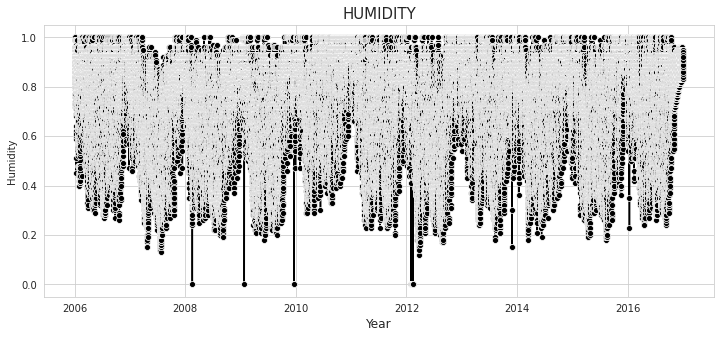

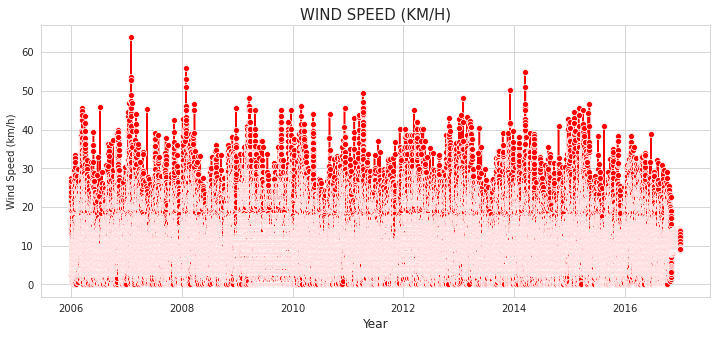

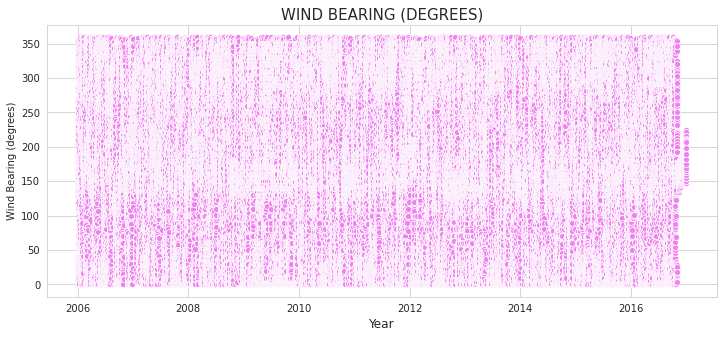

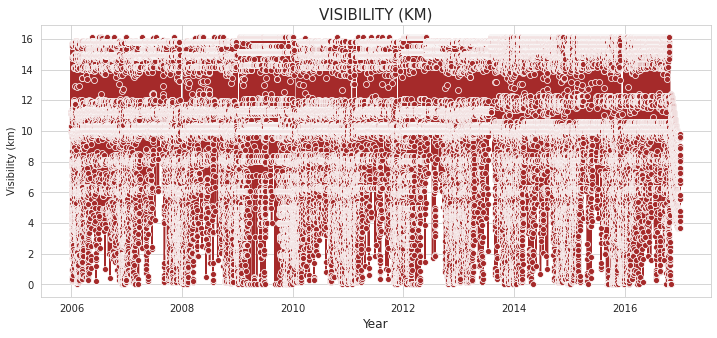

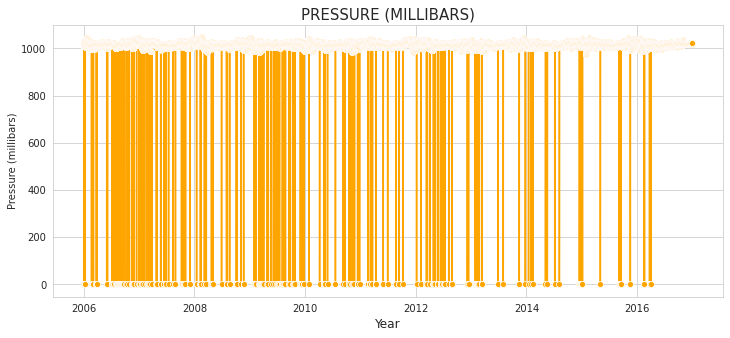

In [20]:
# Plotting Weather Data
color={2:'blue',
       3:'pink',
       4:'black',
       5:'red',
       6:'violet',
       7:'brown',
       8:'orange'}
for index in range(2,9):
    plt.figure(figsize=(12,5))
    plt.xlabel('Year', fontsize=12)
    plt.title('{}'.format(data.columns[index].upper()), fontsize=15)
    sns.lineplot(data=data.iloc[:,index], 
                 color=color[index], marker='o')
    plt.show()

In [21]:
data.corr()

Temperature (C)  Apparent Temperature (C)  Humidity  \
Temperature (C)                  1.000000                  0.992629 -0.632255   
Apparent Temperature (C)         0.992629                  1.000000 -0.602571   
Humidity                        -0.632255                 -0.602571  1.000000   
Wind Speed (km/h)                0.008957                 -0.056650 -0.224951   
Wind Bearing (degrees)           0.029988                  0.029031  0.000735   
Visibility (km)                  0.392847                  0.381718 -0.369173   
Pressure (millibars)            -0.005447                 -0.000219  0.005454   

                          Wind Speed (km/h)  Wind Bearing (degrees)  \
Temperature (C)                    0.008957                0.029988   
Apparent Temperature (C)          -0.056650                0.029031   
Humidity                          -0.224951                0.000735   
Wind Speed (km/h)                  1.000000                0.103822   
Wind Bearing (degrees)             0.103822                1.000000   
Visibility (km)                    0.100749                0.047594   
Pressure (millibars)              -0.049263               -0.011651   

                          Visibility (km)  Pressure (millibars)  
Temperature (C)                  0.392847             -0.005447  
Apparent Temperature (C)         0.381718             -0.000219  
Humidity                        -0.369173              0.005454  
Wind Speed (km/h)                0.100749             -0.049263  
Wind Bearing (degrees)           0.047594             -0.011651  
Visibility (km)                  1.000000              0.059818  
Pressure (millibars)             0.059818              1.000000

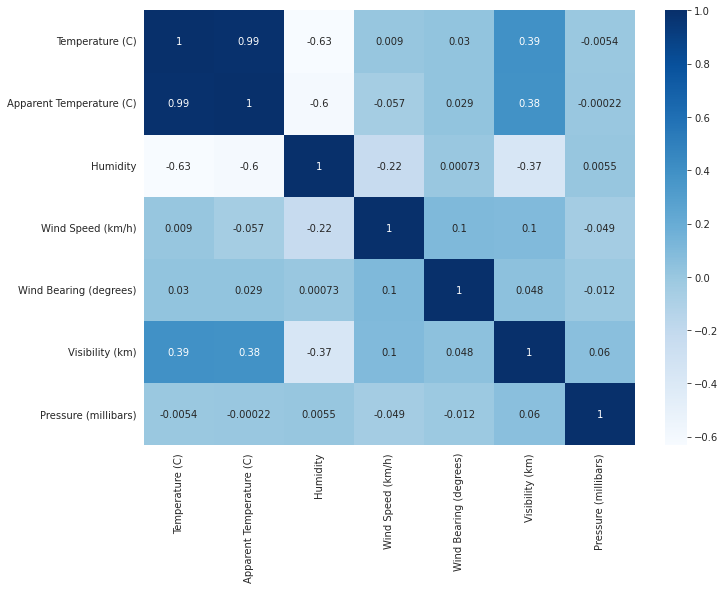

In [22]:
plt.figure(figsize=(11,8))
sns.heatmap(data = data.corr(), annot = True, cmap = 'Blues')
plt.show()

In [23]:
indices = ['Temperature (C)', 'Humidity', 'Precip Type', 'Summary']
ex_data = data.loc[:,indices]
ex_data

Temperature (C)  Humidity Precip Type  \
Formatted Date                                                     
2006-03-31 22:00:00+00:00         9.472222      0.89        rain   
2006-03-31 23:00:00+00:00         9.355556      0.86        rain   
2006-04-01 00:00:00+00:00         9.377778      0.89        rain   
2006-04-01 01:00:00+00:00         8.288889      0.83        rain   
2006-04-01 02:00:00+00:00         8.755556      0.83        rain   
...                                    ...       ...         ...   
2016-09-09 17:00:00+00:00        26.016667      0.43        rain   
2016-09-09 18:00:00+00:00        24.583333      0.48        rain   
2016-09-09 19:00:00+00:00        22.038889      0.56        rain   
2016-09-09 20:00:00+00:00        21.522222      0.60        rain   
2016-09-09 21:00:00+00:00        20.438889      0.61        rain   

                                 Summary  
Formatted Date                            
2006-03-31 22:00:00+00:00  Partly Cloudy  
2006-03-31 23:00:00+00:00  Partly Cloudy  
2006-04-01 00:00:00+00:00  Mostly Cloudy  
2006-04-01 01:00:00+00:00  Partly Cloudy  
2006-04-01 02:00:00+00:00  Mostly Cloudy  
...                                  ...  
2016-09-09 17:00:00+00:00  Partly Cloudy  
2016-09-09 18:00:00+00:00  Partly Cloudy  
2016-09-09 19:00:00+00:00  Partly Cloudy  
2016-09-09 20:00:00+00:00  Partly Cloudy  
2016-09-09 21:00:00+00:00  Partly Cloudy  

[96453 rows x 4 columns]

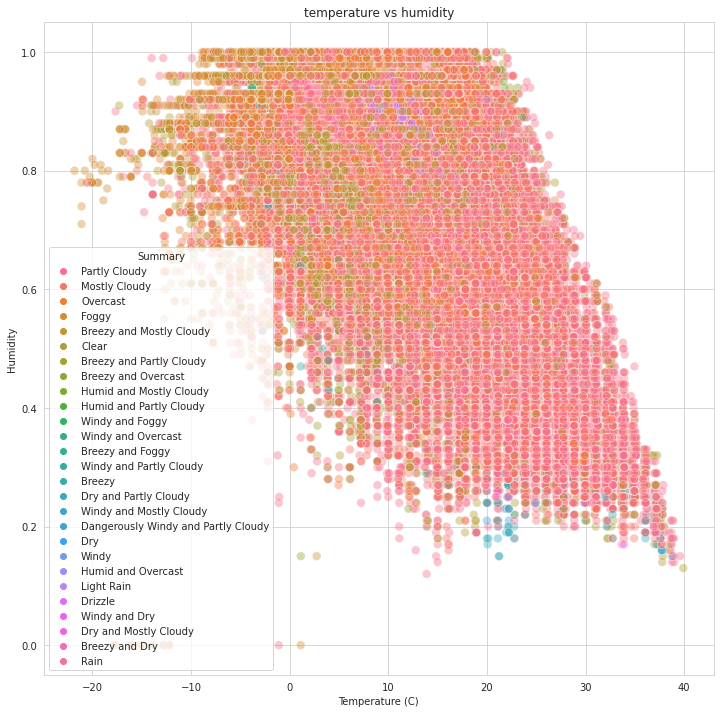

In [24]:
#scatter plot for temperature and humidity by summary
plt.figure(figsize = (12,12))
plt.title('temperature vs humidity')
sns.scatterplot(x=ex_data.iloc[:,0], y=ex_data.iloc[:,1], hue= ex_data.iloc[:,3], s=75, alpha = 0.4)
plt.show()

       Temperature (C)      Humidity
count     96453.000000  96453.000000
mean         11.932678      0.734899
std           9.551546      0.195473
min         -21.822222      0.000000
25%           4.688889      0.600000
50%          12.000000      0.780000
75%          18.838889      0.890000
max          39.905556      1.000000


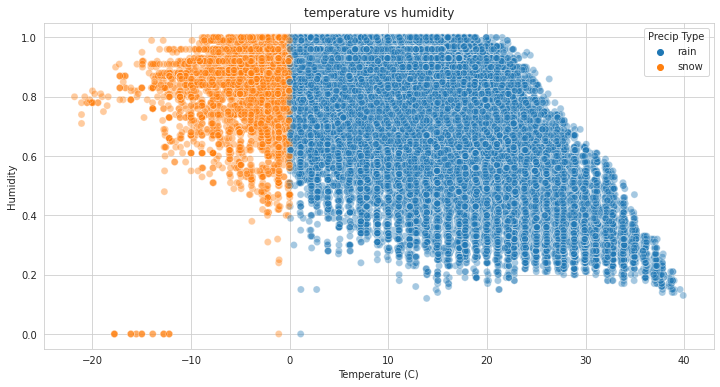

In [25]:
#scatter plot for temperature and humidity by percip type

plt.figure(figsize = (12,6))
print(ex_data.describe())
plt.title('temperature vs humidity')
sns.scatterplot(x=ex_data.iloc[:,0], y=ex_data.iloc[:,1], hue= ex_data.iloc[:,2], s=50, alpha = 0.4)
plt.show()

In [26]:
#Function for plotting year-wise data
def year_plot(year):
    temp = ex_data[ex_data.index.year==year]
    plt.figure(figsize=(8,4))
    plt.title('Temperature vs Humidity for {}'.format(year))
    sns.scatterplot(x=temp.iloc[:,0], 
                    y=temp.iloc[:,1],
                    hue=temp.iloc[:,2],
                    s=50,
                    alpha = 0.3)
    plt.show()
    print(temp.describe())
    print('-'*70)

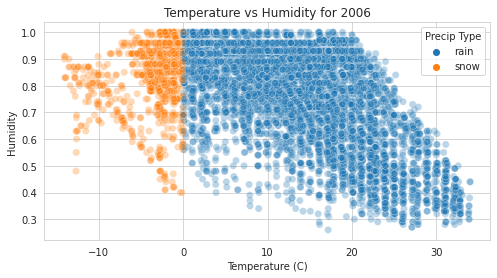

       Temperature (C)     Humidity
count      8760.000000  8760.000000
mean         11.215225     0.767349
std           9.597856     0.174838
min         -14.088889     0.260000
25%           2.805556     0.650000
50%          11.711111     0.810000
75%          18.209722     0.920000
max          34.005556     1.000000
----------------------------------------------------------------------


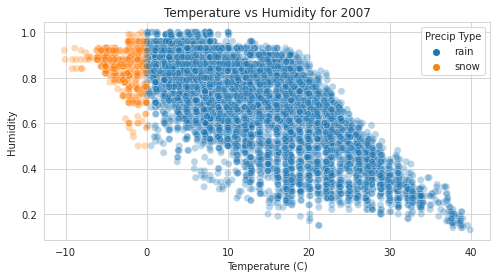

       Temperature (C)     Humidity
count      8760.000000  8760.000000
mean         12.134677     0.689647
std           9.384959     0.199642
min         -10.155556     0.130000
25%           5.033333     0.550000
50%          11.138889     0.740000
75%          18.800000     0.850000
max          39.905556     1.000000
----------------------------------------------------------------------


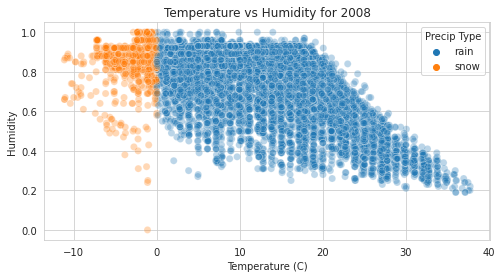

       Temperature (C)     Humidity
count      8784.000000  8784.000000
mean         12.161819     0.701239
std           9.177221     0.184552
min         -11.127778     0.000000
25%           5.583333     0.570000
50%          11.577778     0.740000
75%          18.656944     0.850000
max          37.755556     1.000000
----------------------------------------------------------------------


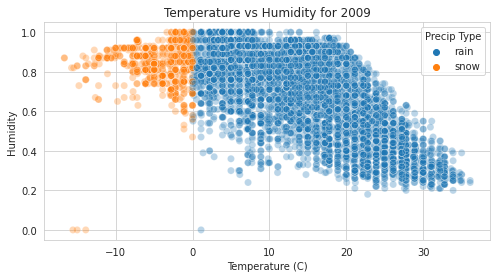

       Temperature (C)     Humidity
count      8760.000000  8760.000000
mean         12.269682     0.707247
std           9.769443     0.204392
min         -16.666667     0.000000
25%           5.000000     0.560000
50%          12.508333     0.760000
75%          19.894444     0.880000
max          36.111111     1.000000
----------------------------------------------------------------------


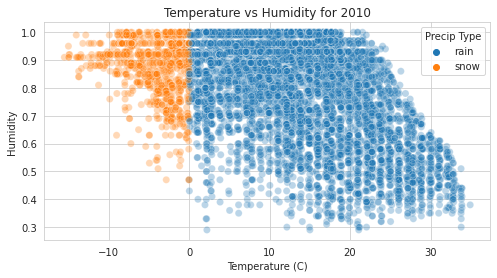

       Temperature (C)     Humidity
count      8784.000000  8784.000000
mean         11.200176     0.796861
std           9.651203     0.168371
min         -15.483333     0.290000
25%           3.750000     0.690000
50%          11.975000     0.850000
75%          17.800000     0.930000
max          34.927778     1.000000
----------------------------------------------------------------------


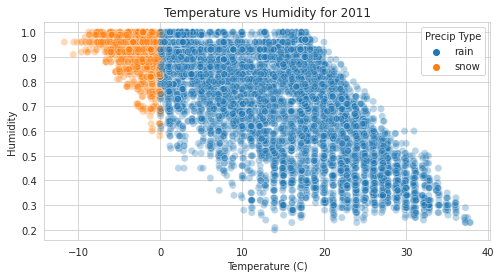

       Temperature (C)     Humidity
count      8760.000000  8760.000000
mean         11.524934     0.736008
std          10.138539     0.202678
min         -11.700000     0.200000
25%           2.665278     0.590000
50%          11.688889     0.790000
75%          18.945833     0.910000
max          37.800000     1.000000
----------------------------------------------------------------------


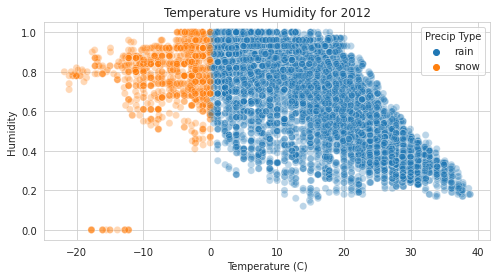

       Temperature (C)     Humidity
count      8784.000000  8784.000000
mean         11.986824     0.689513
std          11.021216     0.218004
min         -21.822222     0.000000
25%           3.793056     0.527500
50%          12.222222     0.730000
75%          20.000000     0.870000
max          38.861111     1.000000
----------------------------------------------------------------------


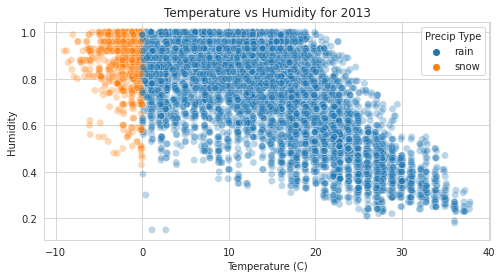

       Temperature (C)     Humidity
count      8760.000000  8760.000000
mean         11.941017     0.754197
std           9.389492     0.194925
min          -8.983333     0.150000
25%           3.943056     0.630000
50%          11.941667     0.800000
75%          18.750000     0.920000
max          37.872222     1.000000
----------------------------------------------------------------------


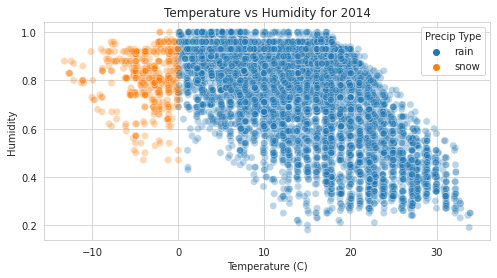

       Temperature (C)     Humidity
count      8757.000000  8757.000000
mean         12.528228     0.748571
std           8.184753     0.183548
min         -13.255556     0.180000
25%           6.600000     0.640000
50%          12.355556     0.800000
75%          18.344444     0.900000
max          33.911111     1.000000
----------------------------------------------------------------------


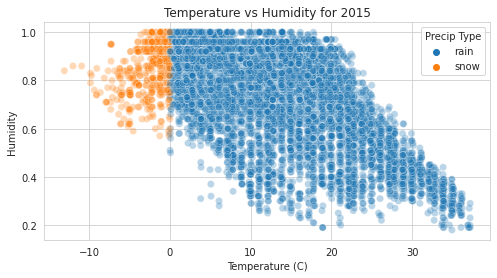

       Temperature (C)     Humidity
count      8760.000000  8760.000000
mean         12.312088     0.732354
std           9.366111     0.200232
min         -13.066667     0.180000
25%           4.433333     0.590000
50%          12.055556     0.780000
75%          18.911111     0.900000
max          37.194444     1.000000
----------------------------------------------------------------------


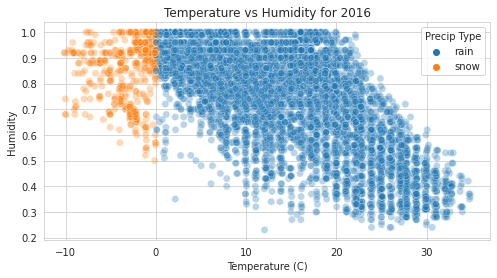

       Temperature (C)     Humidity
count      8783.000000  8783.000000
mean         11.987381     0.760868
std           9.029420     0.182269
min         -10.133333     0.230000
25%           4.788889     0.650000
50%          11.088889     0.810000
75%          18.800000     0.900000
max          34.811111     1.000000
----------------------------------------------------------------------


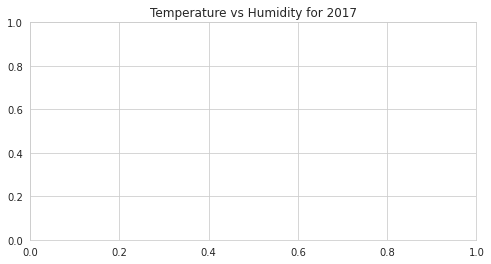

       Temperature (C)  Humidity
count              0.0       0.0
mean               NaN       NaN
std                NaN       NaN
min                NaN       NaN
25%                NaN       NaN
50%                NaN       NaN
75%                NaN       NaN
max                NaN       NaN
----------------------------------------------------------------------


In [27]:
for year in range(2006,2018):
    year_plot(year)

# >  @YEAR WISE ANALYSIS DATA 

In [28]:
#Resampling the data year-wise by mean

indices = [2,4,6,7,8]
year_data = data.iloc[:,indices].resample('Y').mean()
year_data.head()


Temperature (C)  Humidity  Wind Bearing (degrees)  \
Formatted Date                                                                 
2005-12-31 00:00:00+00:00         0.577778  0.890000              140.000000   
2006-12-31 00:00:00+00:00        11.215225  0.767349              189.339726   
2007-12-31 00:00:00+00:00        12.134677  0.689647              194.106393   
2008-12-31 00:00:00+00:00        12.161819  0.701239              193.860997   
2009-12-31 00:00:00+00:00        12.269682  0.707247              180.477740   

                           Visibility (km)  Pressure (millibars)  
Formatted Date                                                    
2005-12-31 00:00:00+00:00         9.982000           1016.660000  
2006-12-31 00:00:00+00:00         9.757280            992.545486  
2007-12-31 00:00:00+00:00        10.408192           1001.639412  
2008-12-31 00:00:00+00:00        10.266882           1007.734488  
2009-12-31 00:00:00+00:00        10.002187           1002.605055

In [29]:
year_data.describe()

Temperature (C)   Humidity  Wind Bearing (degrees)  Visibility (km)  \
count        12.000000  12.000000               12.000000        12.000000   
mean         10.986652   0.747821              183.548221        10.317006   
std           3.304587   0.055752               14.559570         0.683570   
min           0.577778   0.689513              140.000000         9.140282   
25%          11.447507   0.705745              183.182877         9.925820   
50%          11.987102   0.742290              187.804742        10.314776   
75%          12.188785   0.762488              190.024489        10.898033   
max          12.528228   0.890000              194.106393        11.320400   

       Pressure (millibars)  
count             12.000000  
mean            1004.350936  
std                8.761040  
min              987.277688  
25%             1001.064910  
50%             1004.883368  
75%             1009.346742  
max             1016.660000

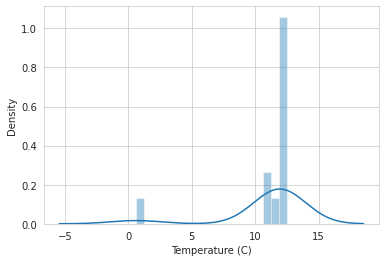

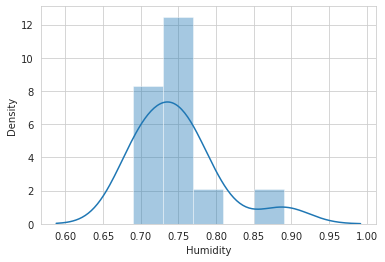

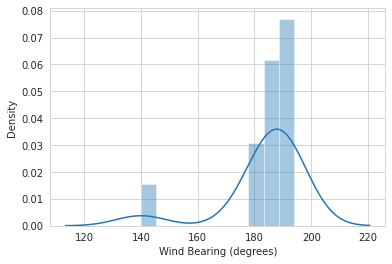

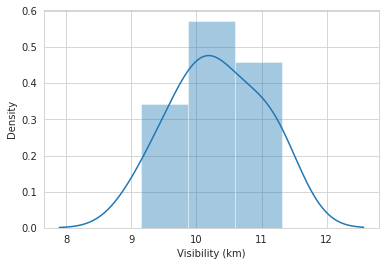

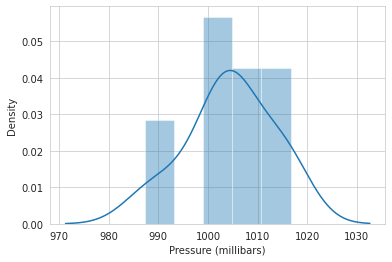

In [30]:
for ind in range(len(year_data.columns)):
    sns.distplot(year_data.iloc[:,ind])
    plt.show()

In [31]:
year_data.corr()

Temperature (C)  Humidity  Wind Bearing (degrees)  \
Temperature (C)                1.000000 -0.840537                0.911849   
Humidity                      -0.840537  1.000000               -0.773141   
Wind Bearing (degrees)         0.911849 -0.773141                1.000000   
Visibility (km)                0.248731 -0.219990               -0.023011   
Pressure (millibars)          -0.456851  0.354860               -0.312691   

                        Visibility (km)  Pressure (millibars)  
Temperature (C)                0.248731             -0.456851  
Humidity                      -0.219990              0.354860  
Wind Bearing (degrees)        -0.023011             -0.312691  
Visibility (km)                1.000000             -0.186035  
Pressure (millibars)          -0.186035              1.000000

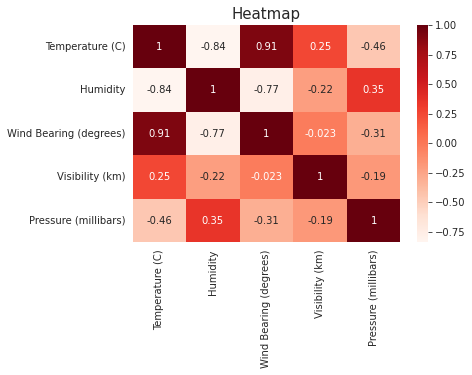

In [32]:
plt.title('Heatmap', fontsize=15)
sns.heatmap(data=year_data.corr(), 
            annot=True, cmap='Reds')
plt.show()

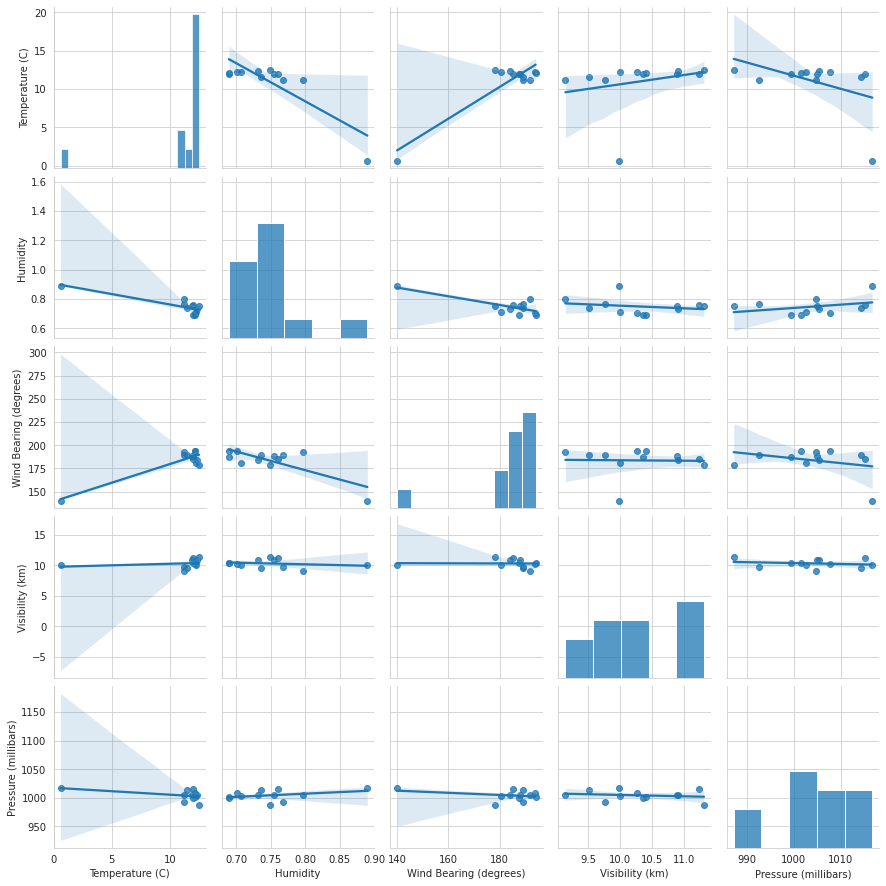

In [33]:
# Pair plot for correlation
sns.pairplot(year_data, kind='reg')
plt.show()

In [34]:
#normalizing year data

normal_data = (year_data - year_data.min())/ (year_data.max() - year_data.min())
normal_data.head()

Temperature (C)  Humidity  Wind Bearing (degrees)  \
Formatted Date                                                                 
2005-12-31 00:00:00+00:00         0.000000  1.000000                0.000000   
2006-12-31 00:00:00+00:00         0.890129  0.388237                0.911902   
2007-12-31 00:00:00+00:00         0.967068  0.000671                1.000000   
2008-12-31 00:00:00+00:00         0.969339  0.058487                0.995465   
2009-12-31 00:00:00+00:00         0.978365  0.088454                0.748114   

                           Visibility (km)  Pressure (millibars)  
Formatted Date                                                    
2005-12-31 00:00:00+00:00         0.386088              1.000000  
2006-12-31 00:00:00+00:00         0.283011              0.179285  
2007-12-31 00:00:00+00:00         0.581579              0.488788  
2008-12-31 00:00:00+00:00         0.516761              0.696228  
2009-12-31 00:00:00+00:00         0.395348              0.521653

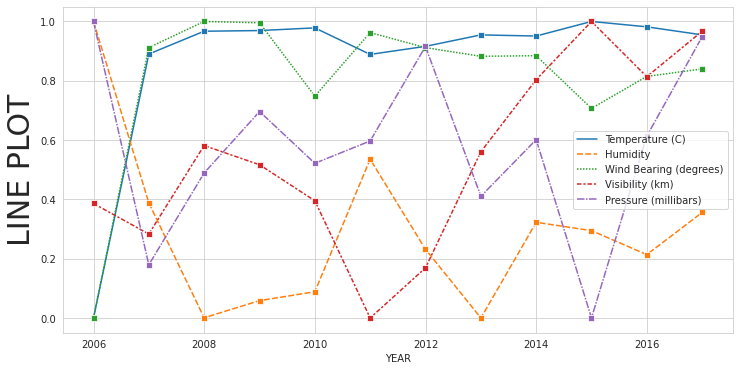

In [35]:
#Line graph representation
plt.figure(figsize=(12,6))
plt.xlabel('YEAR')
plt.ylabel('LINE PLOT', fontsize=30)
sns.lineplot(data = normal_data, marker = 's')
plt.show()

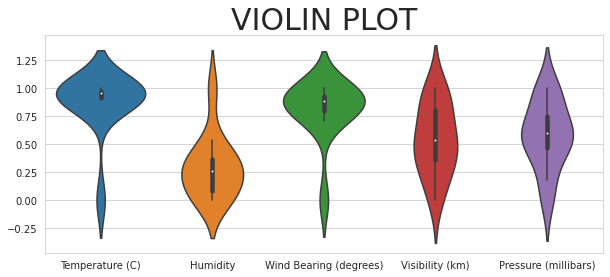

In [36]:
#Violin Plot
plt.figure(figsize = (10,4))
plt.title('VIOLIN PLOT', fontsize=30)
sns.violinplot(data=normal_data)
plt.show()

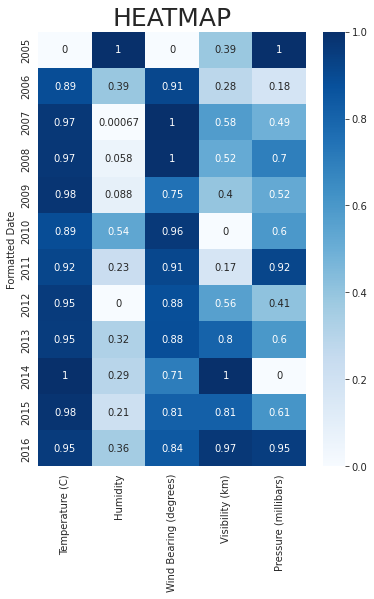

In [37]:
# Heatmap
plt.figure(figsize=(6,8))
plt.title('HEATMAP', fontsize=25)
sns.heatmap(normal_data, annot=True, cmap='Blues',
            yticklabels=normal_data.index.year)
plt.show()

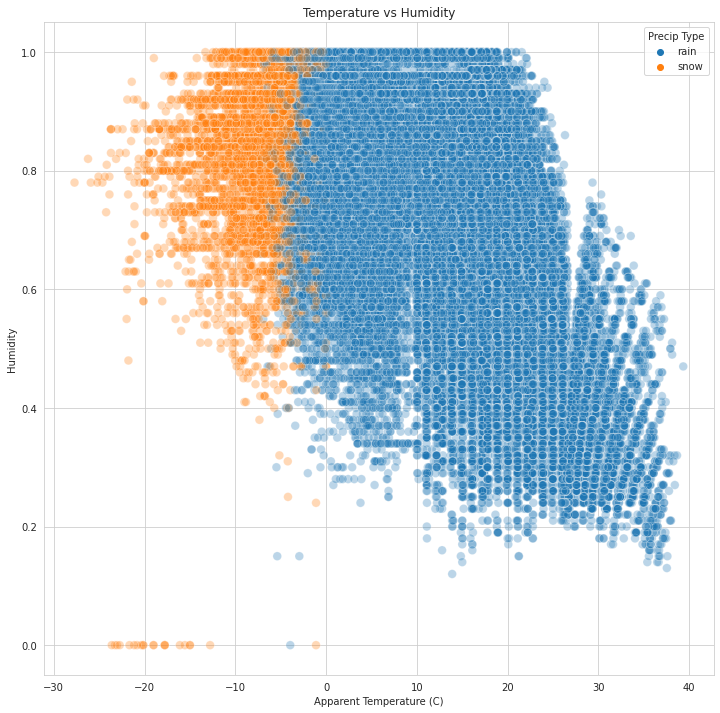

In [38]:
# Plot for Apparent TEmperature and Humidity by Precip Type
plt.figure(figsize=(12,12))
plt.title('Temperature vs Humidity')
sns.scatterplot(x=data.iloc[:,3],
                y=data.iloc[:,4],
               hue=data.iloc[:,1], s=75, alpha = 0.3)
plt.show()

In [39]:
#Resampling data month-wise by mean
monthly_data = data.iloc[:,3:5].resample('M').mean()
monthly_data.head()

Apparent Temperature (C)  Humidity
Formatted Date                                               
2005-12-31 00:00:00+00:00                 -4.050000  0.890000
2006-01-31 00:00:00+00:00                 -4.173708  0.834610
2006-02-28 00:00:00+00:00                 -2.990716  0.843467
2006-03-31 00:00:00+00:00                  1.969780  0.778737
2006-04-30 00:00:00+00:00                 12.098827  0.728625

In [40]:
monthly_data.describe()

Apparent Temperature (C)    Humidity
count                133.000000  133.000000
mean                  10.689657    0.736422
std                    9.178501    0.101570
min                   -8.817241    0.491250
25%                    1.969780    0.669328
50%                   11.782770    0.735309
75%                   19.526790    0.823965
max                   24.525343    0.925390

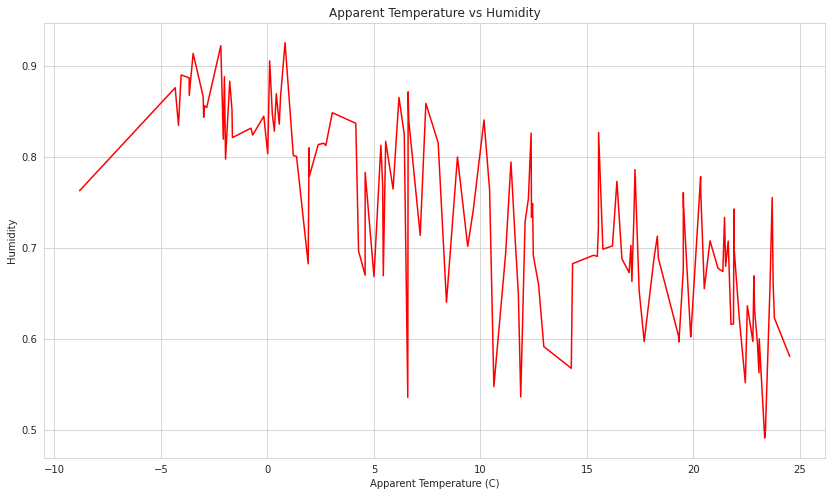

In [41]:
#Graphical representation
plt.figure(figsize=(14,8))
plt.title('Apparent Temperature vs Humidity')
sns.lineplot(x=monthly_data.iloc[:,0],
             y=monthly_data.iloc[:,1],
             color='red')
plt.show()

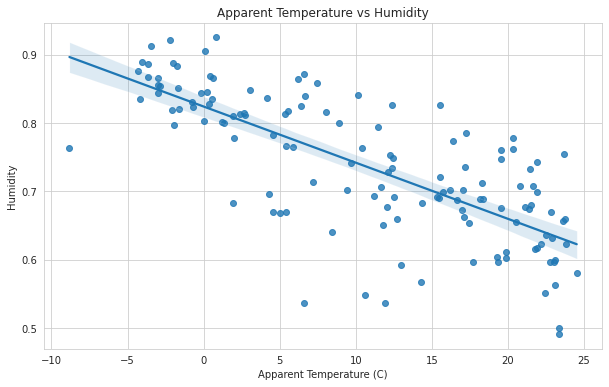

In [42]:
# Regression plot for Apparent Temperature & Humidity
plt.figure(figsize=(10,6))
plt.title('Apparent Temperature vs Humidity')
sns.regplot(x=monthly_data.iloc[:,0],
            y=monthly_data.iloc[:,1])
plt.show()

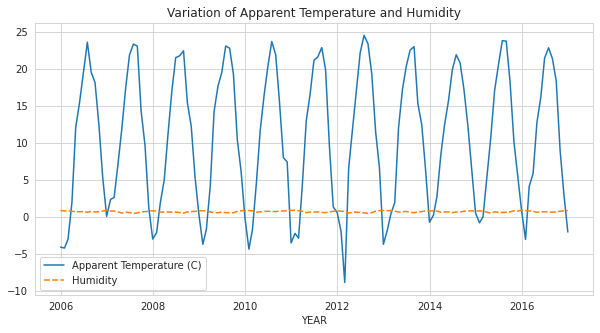

In [43]:
plt.figure(figsize=(10,5))
plt.xlabel('YEAR')
plt.title('Variation of Apparent Temperature and Humidity')
sns.lineplot(data=monthly_data)
plt.show()

                          Apparent Temperature (C)  Humidity
Apparent Temperature (C)                   1.00000  -0.74289
Humidity                                  -0.74289   1.00000


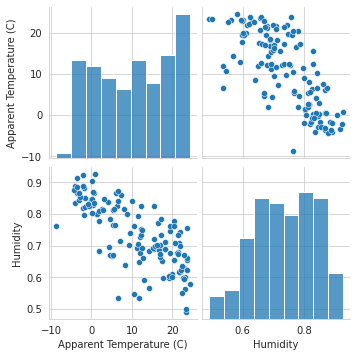

In [44]:
print(monthly_data.corr())
sns.pairplot(monthly_data, kind = 'scatter')
plt.show()

In [45]:
# Function for plotting Humidity & Apparent Temperature for all month
TEMP_DATA = monthly_data.iloc[:,0]
HUM_DATA = monthly_data.iloc[:,1]
def label_color(month):
    if month == 1:
        return 'January','blue'
    elif month == 2:
        return 'February','green'
    elif month == 3:
        return 'March','orange'
    elif month == 4:
        return 'April','yellow'
    elif month == 5:
        return 'May','red'
    elif month == 6:
        return 'June','violet'
    elif month == 7:
        return 'July','purple'
    elif month == 8:
        return 'August','black'
    elif month == 9:
        return 'September','brown'
    elif month == 10:
        return 'October','darkblue'
    elif month == 11:
        return 'November','grey'
    else:
        return 'December','pink'

def plot_month(month, data):
    label, color = label_color(month)
    mdata = data[data.index.month == month]
    sns.lineplot(data=mdata,
                 label=label,
                 color=color,
                 marker='o')
    
def sns_plot(title, data):
    plt.figure(figsize=(14,8))
    plt.title(title)
    plt.xlabel('YEAR')
    for i in range(1,13):
        plot_month(i,data)
    plt.show()

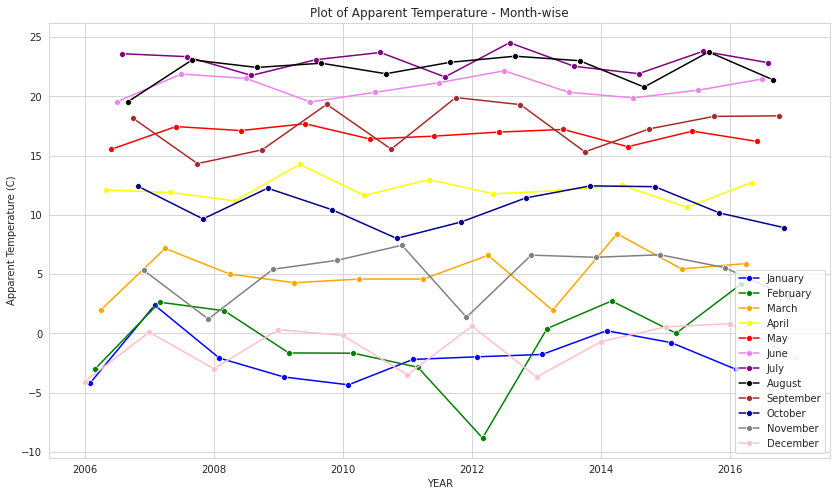

In [46]:
# Month-wise Plot for Apparent Temperature of 10 years 
title = 'Plot of Apparent Temperature - Month-wise' 
sns_plot(title, TEMP_DATA)


In [47]:
# Function for plotting Apparent Temperature & Humidity for each month
def sns_month_plot(month):
    plt.figure(figsize=(10,5))
    label = label_color(month)[0]
    plt.title('Apparent Temperature & Humidity - {}'.format(label))
    plt.xlabel('YEAR')
    data = monthly_data[monthly_data.index.month == month]
    sns.lineplot(data=data, marker='o')
    plt.show()
    print(data.describe())
    sns.pairplot(data, kind='reg')
    plt.show()
    print('-'*80)

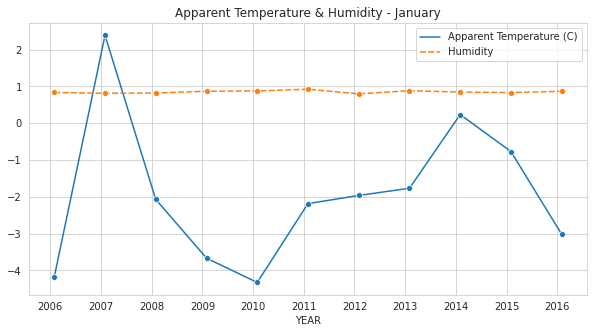

       Apparent Temperature (C)   Humidity
count                 11.000000  11.000000
mean                  -1.938761   0.850698
std                    1.994305   0.036231
min                   -4.329062   0.797581
25%                   -3.342257   0.825497
50%                   -2.069907   0.846169
75%                   -1.269351   0.871767
max                    2.387015   0.922030


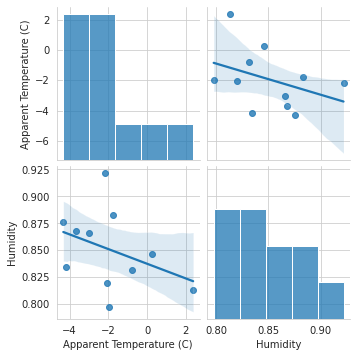

--------------------------------------------------------------------------------


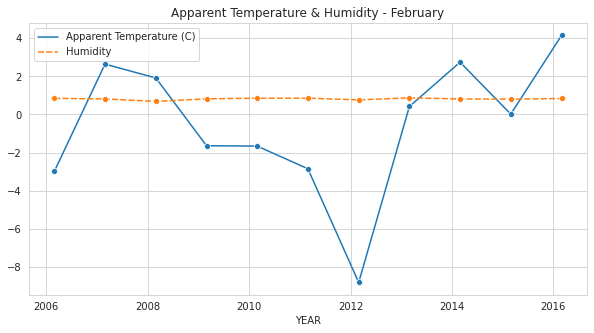

       Apparent Temperature (C)   Humidity
count                 11.000000  11.000000
mean                  -0.552392   0.813920
std                    3.639693   0.052467
min                   -8.817241   0.682615
25%                   -2.255758   0.807991
50%                    0.017006   0.821161
75%                    2.277722   0.847574
max                    4.150782   0.869345


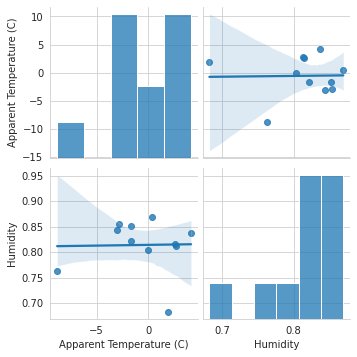

--------------------------------------------------------------------------------


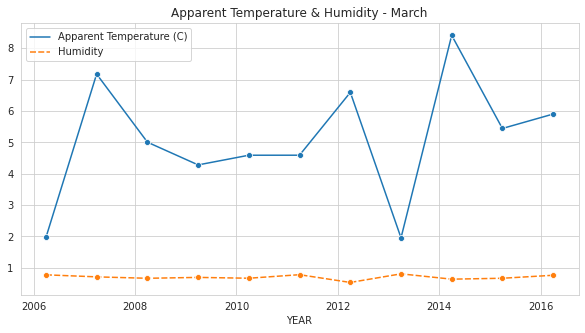

       Apparent Temperature (C)   Humidity
count                 11.000000  11.000000
mean                   5.082583   0.702849
std                    1.977499   0.079217
min                    1.957445   0.535941
25%                    4.434812   0.668972
50%                    5.004353   0.696680
75%                    6.246453   0.771707
max                    8.408303   0.809946


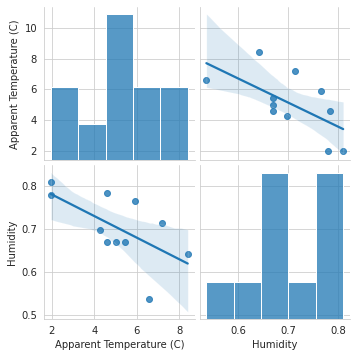

--------------------------------------------------------------------------------


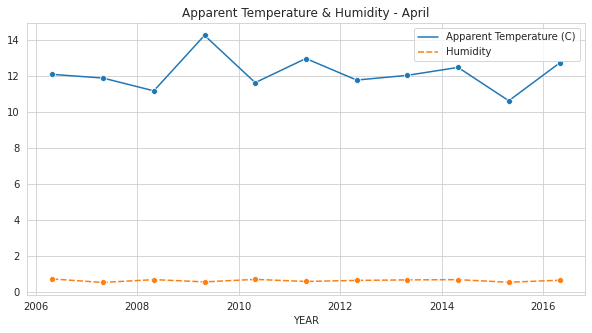

       Apparent Temperature (C)   Humidity
count                 11.000000  11.000000
mean                  12.158287   0.641051
std                    0.965900   0.068193
min                   10.632801   0.536361
25%                   11.711088   0.579736
50%                   12.045563   0.659972
75%                   12.608804   0.692299
max                   14.267076   0.728625


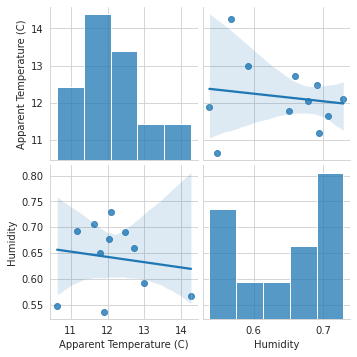

--------------------------------------------------------------------------------


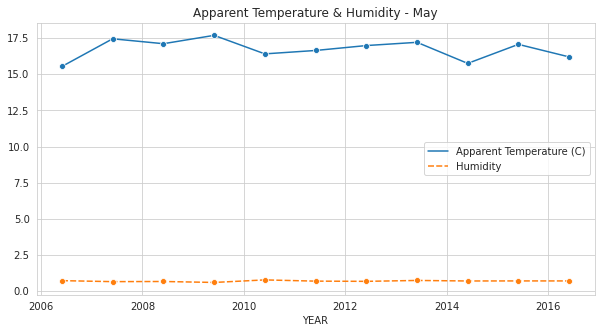

       Apparent Temperature (C)   Humidity
count                 11.000000  11.000000
mean                  16.733265   0.691650
std                    0.690476   0.046167
min                   15.539479   0.597151
25%                   16.304547   0.667997
50%                   16.985596   0.698602
75%                   17.161279   0.712272
max                   17.691256   0.773091


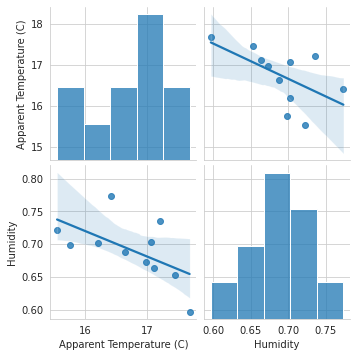

--------------------------------------------------------------------------------


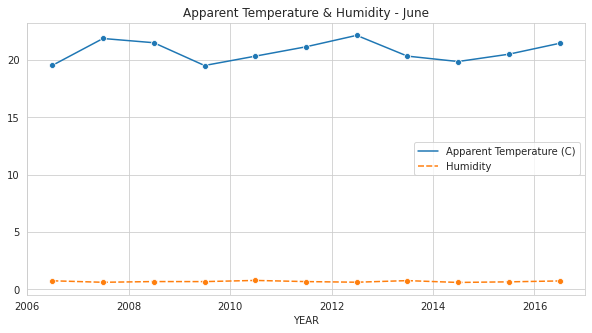

       Apparent Temperature (C)   Humidity
count                 11.000000  11.000000
mean                  20.755415   0.686418
std                    0.929861   0.061076
min                   19.526790   0.602403
25%                   20.107438   0.638757
50%                   20.511782   0.677611
75%                   21.488569   0.740292
max                   22.157130   0.778347


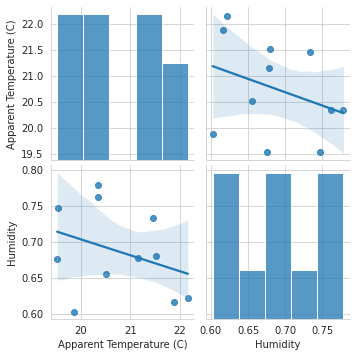

--------------------------------------------------------------------------------


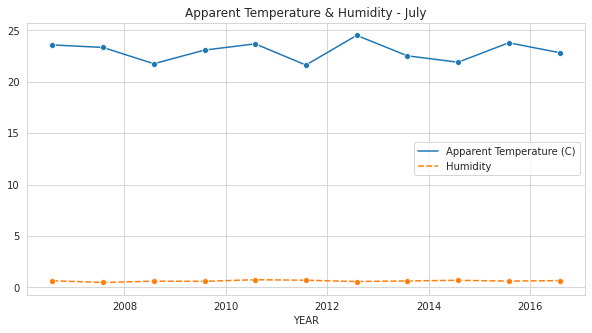

       Apparent Temperature (C)   Humidity
count                 11.000000  11.000000
mean                  22.977215   0.639615
std                    0.935654   0.071127
min                   21.634984   0.491250
25%                   22.222634   0.608118
50%                   23.091614   0.636586
75%                   23.647398   0.684360
max                   24.525343   0.755323


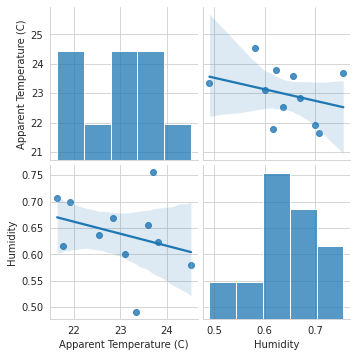

--------------------------------------------------------------------------------


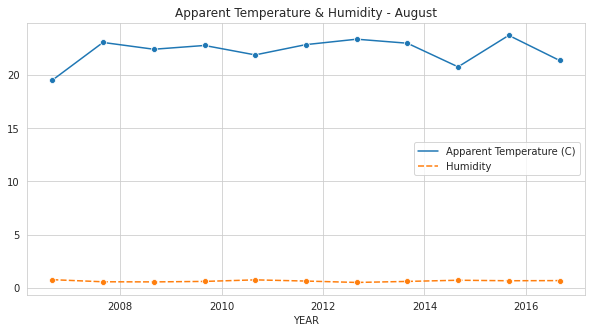

       Apparent Temperature (C)   Humidity
count                 11.000000  11.000000
mean                  22.265649   0.634984
std                    1.262309   0.082539
min                   19.528241   0.500081
25%                   21.644904   0.579570
50%                   22.794205   0.631263
75%                   23.042469   0.690927
max                   23.745766   0.760753


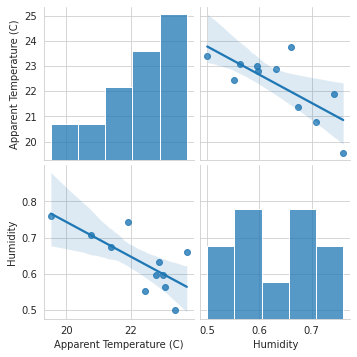

--------------------------------------------------------------------------------


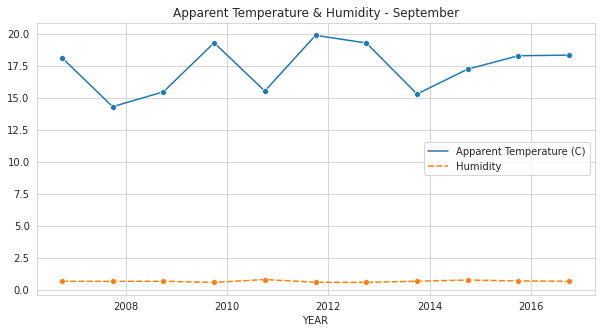

       Apparent Temperature (C)   Humidity
count                 11.000000  11.000000
mean                  17.389856   0.689163
std                    1.916780   0.071334
min                   14.328457   0.596764
25%                   15.519510   0.647042
50%                   18.155571   0.689444
75%                   18.829390   0.702438
max                   19.899900   0.826806


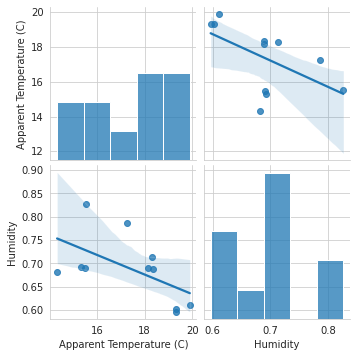

--------------------------------------------------------------------------------


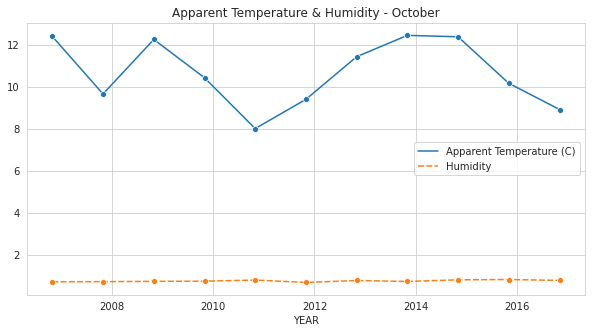

       Apparent Temperature (C)   Humidity
count                 11.000000  11.000000
mean                  10.684673   0.774443
std                    1.586861   0.043637
min                    8.017145   0.701747
25%                    9.533890   0.744852
50%                   10.433535   0.763468
75%                   12.317596   0.807722
max                   12.449134   0.840524


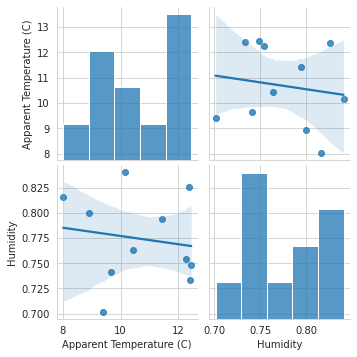

--------------------------------------------------------------------------------


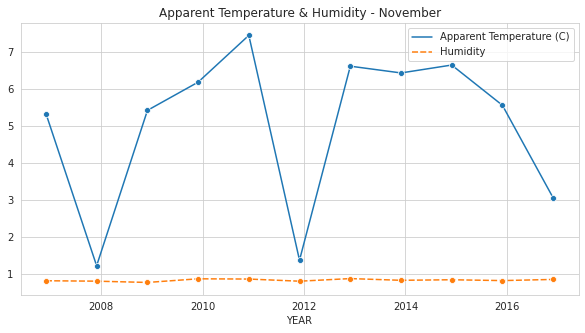

       Apparent Temperature (C)   Humidity
count                 11.000000  11.000000
mean                   5.020255   0.827917
std                    2.157034   0.032129
min                    1.218225   0.766972
25%                    4.188468   0.807083
50%                    5.553040   0.824792
75%                    6.516898   0.853597
max                    7.440934   0.871389


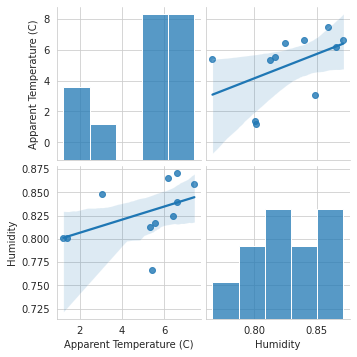

--------------------------------------------------------------------------------


In [48]:
# plot for the month of JANUARY - DECEMBER
for month in range(1,12):
    sns_month_plot(month)

# > **> @ANALYSIS ON NORMALIZED DATA**

In [49]:
# Normalizing data
temp = monthly_data
normed_data = (temp - temp.min()) / (temp.max() - temp.min())
normed_data.head()

Apparent Temperature (C)  Humidity
Formatted Date                                               
2005-12-31 00:00:00+00:00                  0.142978  0.918483
2006-01-31 00:00:00+00:00                  0.139267  0.790898
2006-02-28 00:00:00+00:00                  0.174747  0.811299
2006-03-31 00:00:00+00:00                  0.323521  0.662198
2006-04-30 00:00:00+00:00                  0.627308  0.546771

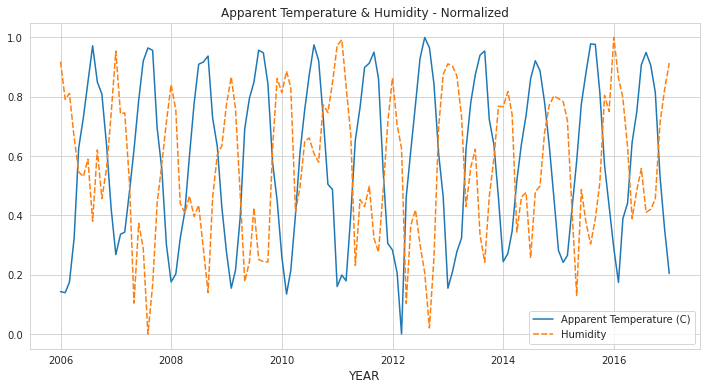

In [50]:
# Line graph representation of normalized data
plt.figure(figsize=(12,6))
plt.title('Apparent Temperature & Humidity - Normalized')
plt.xlabel('YEAR', fontsize=12)
sns.lineplot(data=normed_data)
plt.show()

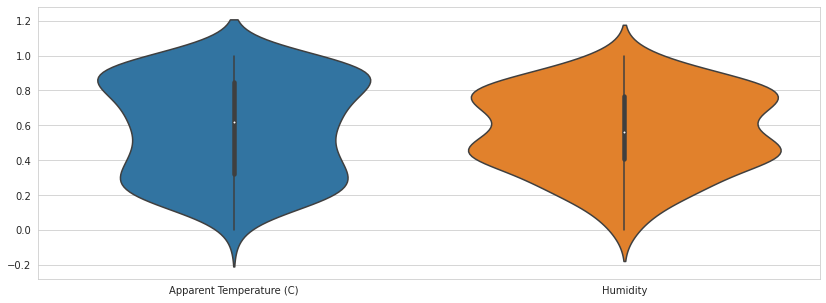

In [51]:
# Violin Plot for above graph
plt.figure(figsize=(14,5))
sns.violinplot(data=normed_data)
plt.show()

In [52]:
def sns_month_plot(month):
    plt.figure(figsize=(10,5))
    label = label_color(month)[0]
    plt.title('Apparent Temperature & Humidity - {}'.format(label))
    plt.xlabel('YEAR')
    data = normed_data[normed_data.index.month == month]
    sns.lineplot(data=data, marker='o')
    plt.show()
    sns.pairplot(data, kind='reg')
    plt.show()
    plt.title('Boxplot - {}'.format(label))
    sns.boxplot(data=data)
    plt.show()
    print('-'*80)

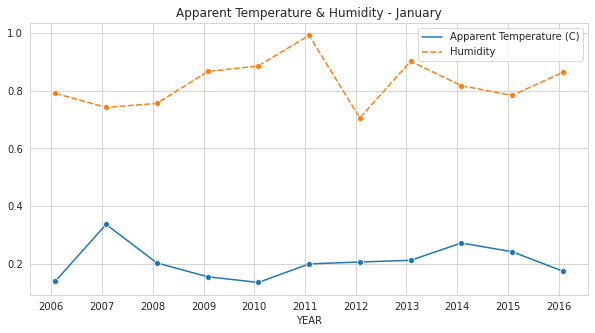

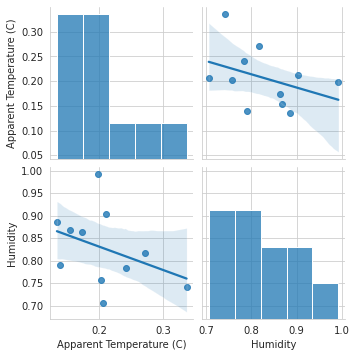

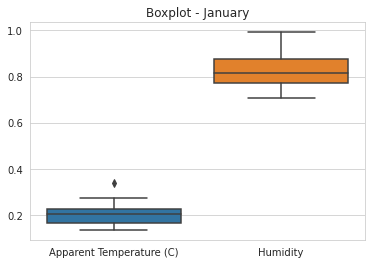

--------------------------------------------------------------------------------


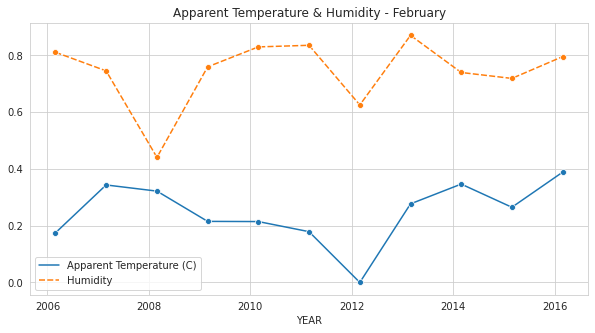

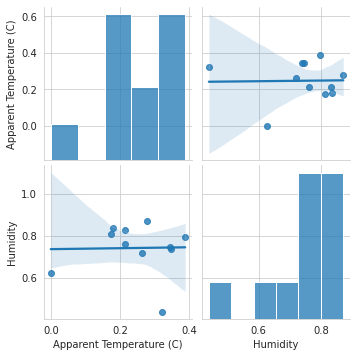

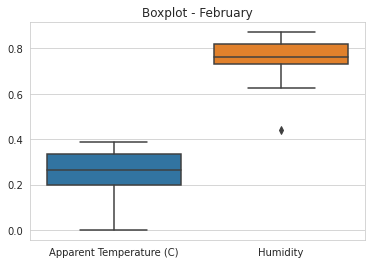

--------------------------------------------------------------------------------


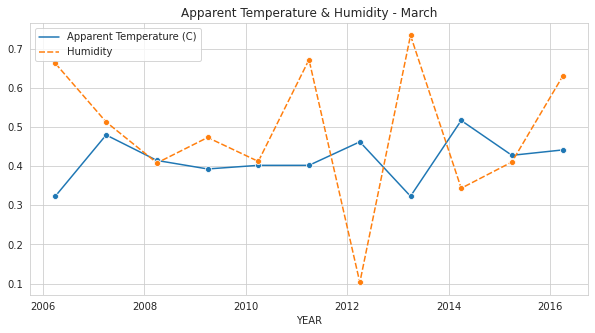

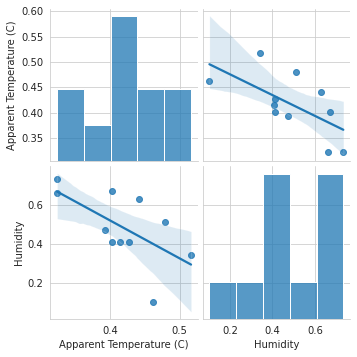

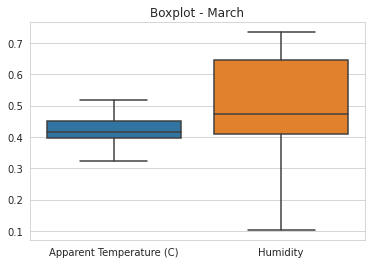

--------------------------------------------------------------------------------


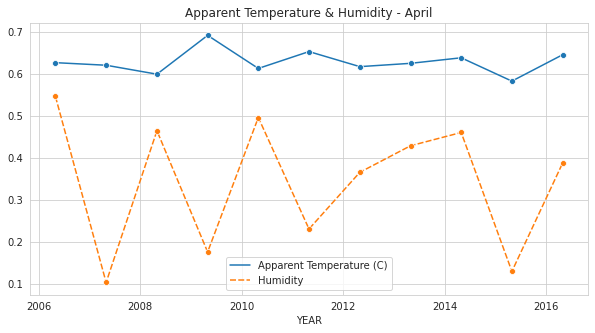

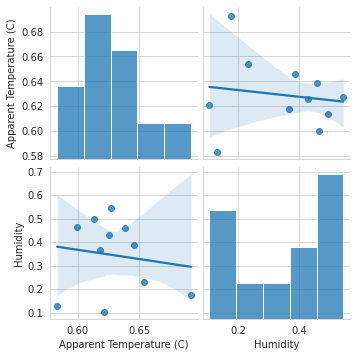

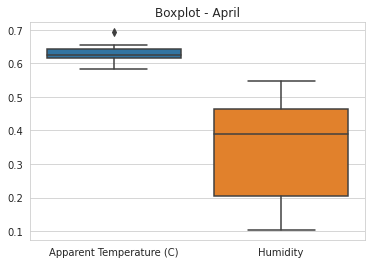

--------------------------------------------------------------------------------


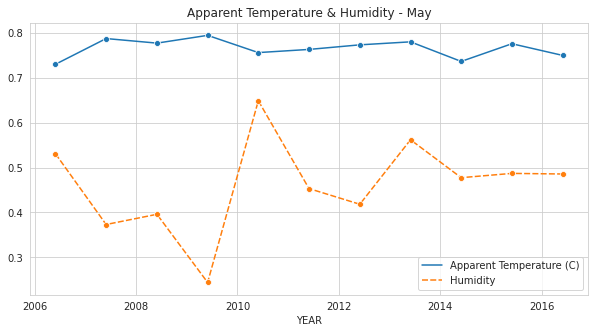

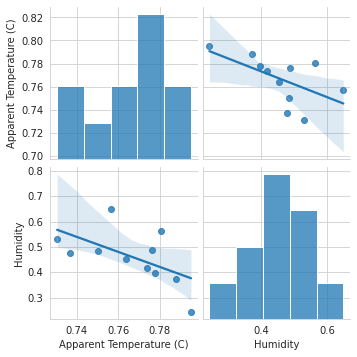

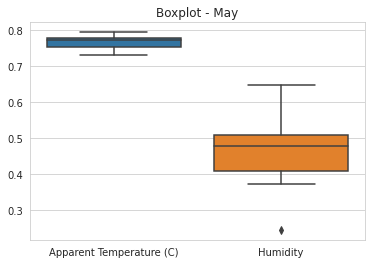

--------------------------------------------------------------------------------


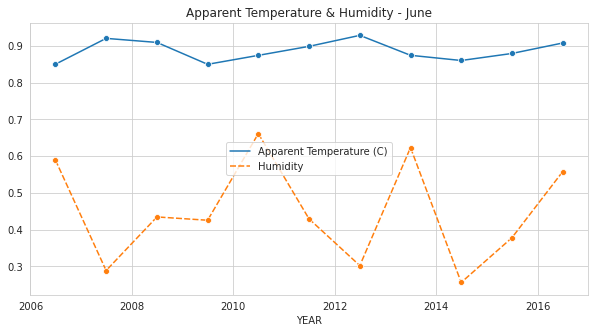

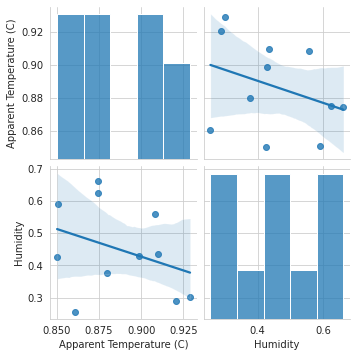

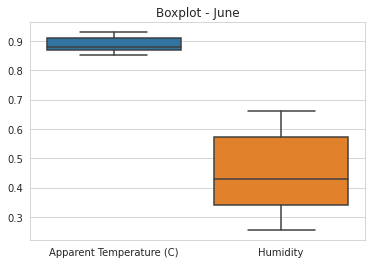

--------------------------------------------------------------------------------


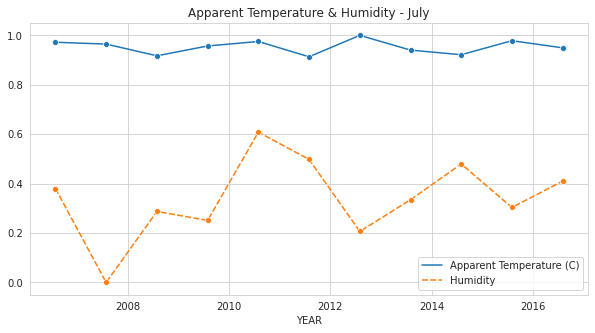

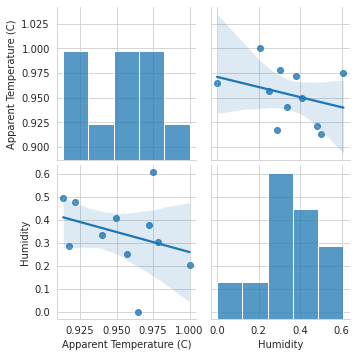

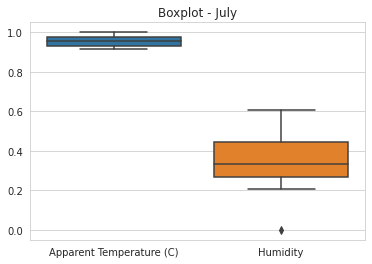

--------------------------------------------------------------------------------


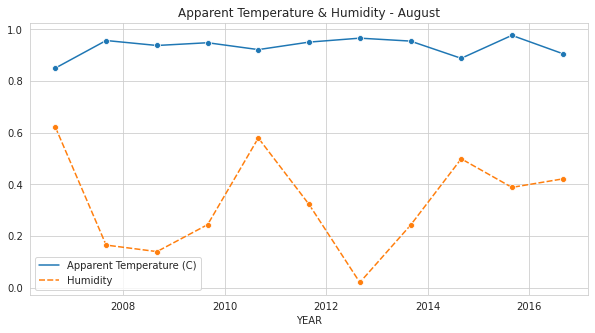

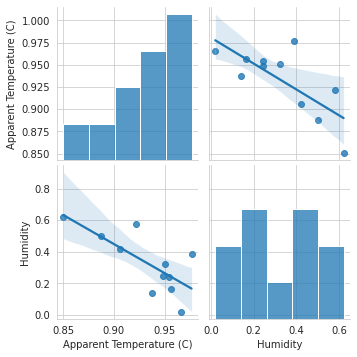

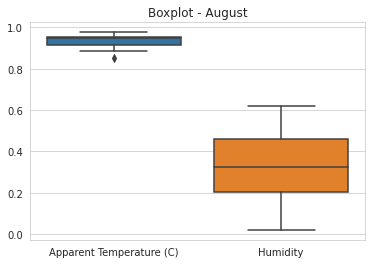

--------------------------------------------------------------------------------


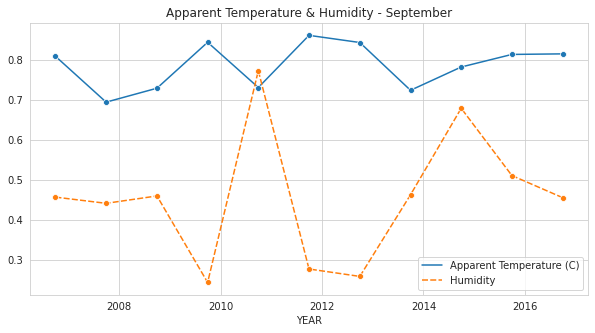

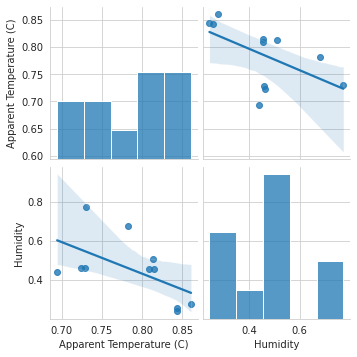

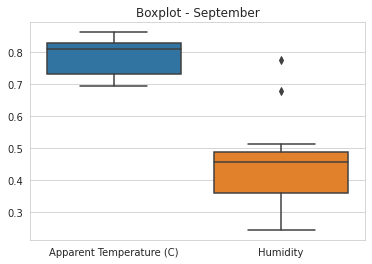

--------------------------------------------------------------------------------


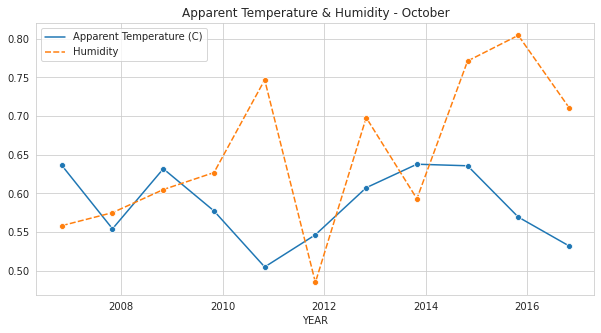

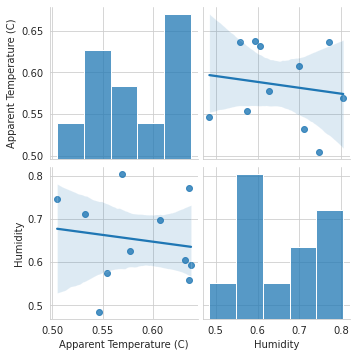

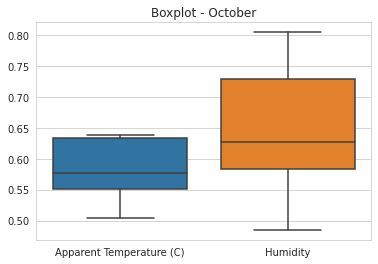

--------------------------------------------------------------------------------


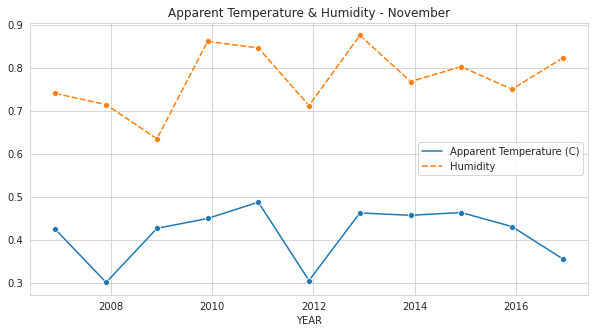

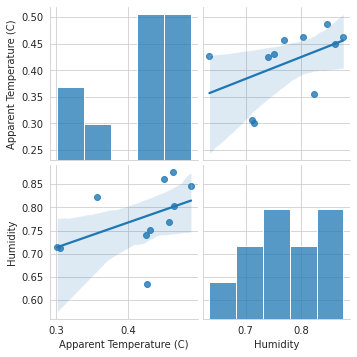

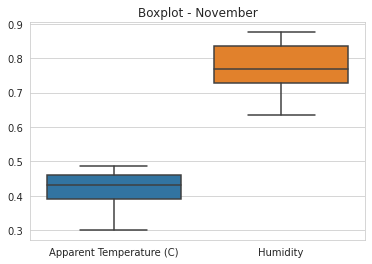

--------------------------------------------------------------------------------


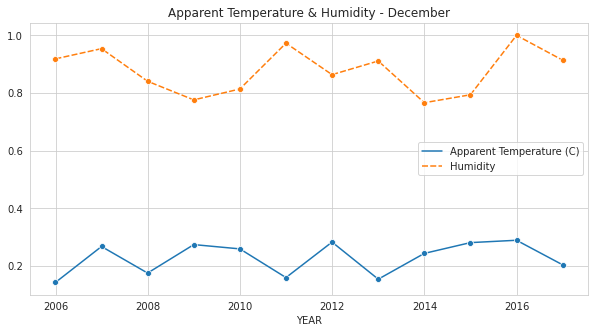

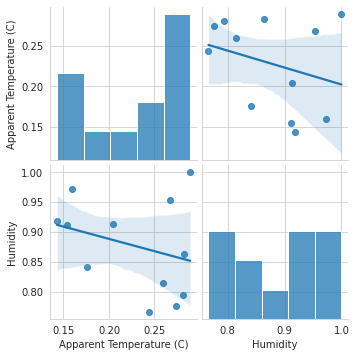

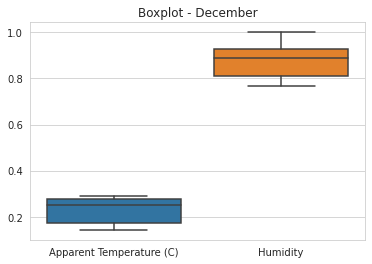

--------------------------------------------------------------------------------


In [53]:
# plot for the month of JANUARY - DECEMBER
for month in range(1,13):
    sns_month_plot(month)